## Loading the data (from 1.0)

In [1]:
from pycocotools.coco import COCO

In [2]:
coco = COCO(annotation_file="/scratch/lt2316-h18-resources/coco/annotations/instances_train2017.json")

loading annotations into memory...
Done (t=19.29s)
creating index...
index created!


In [3]:
cat_cat = coco.getCatIds(catNms="cat")
horse_cat = coco.getCatIds(catNms="horse")
sheep_cat = coco.getCatIds(catNms="sheep")
bird_cat = coco.getCatIds(catNms="bird")
dog_cat = coco.getCatIds(catNms="dog")
bear_cat = coco.getCatIds(catNms="bear")

In [4]:
cat_cat, horse_cat, bear_cat

([17], [19], [23])

In [5]:
cat_imgs = coco.getImgIds(catIds=cat_cat)
horse_imgs = coco.getImgIds(catIds=horse_cat)
sheep_imgs = coco.getImgIds(catIds=sheep_cat)
bird_imgs = coco.getImgIds(catIds=bird_cat)
dog_imgs = coco.getImgIds(catIds=dog_cat)
bear_imgs = coco.getImgIds(catIds=bear_cat)

In [6]:
len(cat_imgs), len(bear_imgs)

(4114, 960)

In [7]:
import random

In [8]:
random.shuffle(cat_imgs)
cat_imgs_train = cat_imgs[:2000]
cat_imgs_test = cat_imgs[2000:2500]

random.shuffle(horse_imgs)
horse_imgs_train = horse_imgs[:2000]
horse_imgs_test = horse_imgs[2000:2500]



random.shuffle(sheep_imgs)
sheep_imgs_train = sheep_imgs[:1223]
sheep_imgs_test = sheep_imgs[1223:1529]


random.shuffle(bird_imgs)
bird_imgs_train = bird_imgs[:2200]
bird_imgs_test = bird_imgs[2200:2640]


random.shuffle(dog_imgs)
dog_imgs_train = dog_imgs[:2200]
dog_imgs_test = dog_imgs[2200:2640]


random.shuffle(bear_imgs)
bear_imgs_train = bear_imgs[:768]
bear_imgs_test = bear_imgs[768:960]


In [10]:
len(cat_imgs_train), len(cat_imgs_test)

(2000, 500)

In [11]:
len([x for x in cat_imgs[0:600] if x in horse_imgs[0:600]])

0

In [9]:
cat_meta_train = coco.loadImgs(ids=cat_imgs_train)
cat_meta_test = coco.loadImgs(ids=cat_imgs_test)
horse_meta_train = coco.loadImgs(ids=horse_imgs_train)
horse_meta_test = coco.loadImgs(ids=horse_imgs_test)


sheep_meta_train = coco.loadImgs(ids=sheep_imgs_train)
sheep_meta_test = coco.loadImgs(ids=sheep_imgs_test)
bird_meta_train = coco.loadImgs(ids=bird_imgs_train)
bird_meta_test = coco.loadImgs(ids=bird_imgs_test)


dog_meta_train = coco.loadImgs(ids=dog_imgs_train)
dog_meta_test = coco.loadImgs(ids=dog_imgs_test)
bear_meta_train = coco.loadImgs(ids=bear_imgs_train)
bear_meta_test = coco.loadImgs(ids=bear_imgs_test)

In [10]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [11]:
%matplotlib inline

In [12]:
from PIL import Image

In [13]:
import numpy as np

In [14]:
def get_data(meta, datadir="/scratch/lt2316-h18-resources/coco/train2017"):
    return [(x['file_name'], Image.open("{}/{}".format(datadir, x['file_name'])).resize((100,100))) for x in meta]

In [15]:
cat_data_train = get_data(cat_meta_train)
horse_data_train = get_data(horse_meta_train)
cat_data_test = get_data(cat_meta_test)
horse_data_test = get_data(horse_meta_test)

bird_data_train = get_data(bird_meta_train)
sheep_data_train = get_data(sheep_meta_train)
bird_data_test = get_data(bird_meta_test)
sheep_data_test = get_data(sheep_meta_test)

bear_data_train = get_data(bear_meta_train)
dog_data_train = get_data(dog_meta_train)
bear_data_test = get_data(bear_meta_test)
dog_data_test = get_data(dog_meta_test)

In [16]:
import pandas as pd

In [17]:
cat_data_train_df = pd.DataFrame(cat_data_train)
cat_data_train_df['class'] = 'cat'

horse_data_train_df = pd.DataFrame(horse_data_train)
horse_data_train_df['class'] = 'horse'

cat_data_test_df = pd.DataFrame(cat_data_test)
cat_data_test_df['class'] = 'cat'

horse_data_test_df = pd.DataFrame(horse_data_test)
horse_data_test_df['class'] = 'horse'


sheep_data_train_df = pd.DataFrame(sheep_data_train)
sheep_data_train_df['class'] = 'sheep'

bird_data_train_df = pd.DataFrame(bird_data_train)
bird_data_train_df['class'] = 'bird'

sheep_data_test_df = pd.DataFrame(sheep_data_test)
sheep_data_test_df['class'] = 'sheep'

bird_data_test_df = pd.DataFrame(bird_data_test)
bird_data_test_df['class'] = 'bird'



dog_data_train_df = pd.DataFrame(dog_data_train)
dog_data_train_df['class'] = 'dog'

bear_data_train_df = pd.DataFrame(bear_data_train)
bear_data_train_df['class'] = 'bear'

dog_data_test_df = pd.DataFrame(dog_data_test)
dog_data_test_df['class'] = 'dog'

bear_data_test_df = pd.DataFrame(bear_data_test)
bear_data_test_df['class'] = 'bear'


In [18]:
train_df = pd.concat([cat_data_train_df, horse_data_train_df,dog_data_train_df, sheep_data_train_df,bird_data_train_df, bear_data_train_df])
test_df = pd.concat([cat_data_test_df, horse_data_test_df,sheep_data_test_df, bird_data_test_df,dog_data_test_df, bear_data_test_df])

In [19]:
label_mapping = {'cat': 0, 'horse': 1, 'dog': 2, 'sheep': 3, 'bird': 4, 'bear': 5}

In [20]:
train_y = [label_mapping.get(x, -1) for x in train_df['class']]

In [125]:
test_y = [label_mapping.get(x, -1) for x in test_df['class']]

In [22]:
train_df['imgs'] = train_df[1].apply(lambda x: x.convert('RGB'))

In [23]:
train_X = np.array([np.array(x) for x in train_df['imgs']])

In [24]:
train_X.shape

(10391, 100, 100, 3)

In [25]:
test_df['imgs'] = test_df[1].apply(lambda x: x.convert('RGB'))

In [26]:
test_X = np.array([np.array(x) for x in test_df['imgs']])

In [27]:
test_X.shape

(2378, 100, 100, 3)

## Scale and standardize the data

In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
all_X = np.concatenate((train_X, test_X))

In [31]:
all_X.shape

(12769, 100, 100, 3)

Changing how the data is caled in order to account for the new multiclass focus

In [35]:
# Calculating the number of features for each sample
num_features = all_X.shape[1] * all_X.shape[2] * all_X.shape[3]  # 100 * 100 * 3

# Reshaping the data to two dimensions: number of samples by number of features
all_X_reshaped = all_X.reshape(-1, num_features)


scaler = StandardScaler()
all_X_scaled = scaler.fit_transform(all_X_reshaped)

# Reshpaing to original 4 dimensional shape
all_X_scaled = all_X_scaled.reshape(all_X.shape)

In [36]:
all_X_scaled.shape

(12769, 100, 100, 3)

In [37]:
all_X_scaled

array([[[[ 0.46506552, -0.25418274, -0.71777918],
         [ 0.46683374, -0.45548347, -0.8515056 ],
         [ 0.23881532, -0.37391176, -0.78797084],
         ...,
         [ 1.19604513,  0.65400319,  0.14627984],
         [ 1.10880814,  0.55481792,  0.07921534],
         [ 1.24336733,  0.75579818,  0.27573411]],

        [[ 0.45042472, -0.28772511, -0.74914765],
         [ 0.52972542, -0.44100759, -0.82485991],
         [ 0.3554258 , -0.27526772, -0.73544841],
         ...,
         [ 1.30575727,  0.77246405,  0.30207867],
         [ 1.14684446,  0.56271239,  0.09893898],
         [ 1.20131352,  0.6714782 ,  0.19787467]],

        [[ 0.52237992, -0.2049015 , -0.67129617],
         [ 0.57402687, -0.41539204, -0.79961438],
         [ 0.51009797, -0.16546053, -0.60840017],
         ...,
         [ 1.39510492,  0.91532147,  0.40675778],
         [ 1.39850053,  0.90679639,  0.4119087 ],
         [ 1.30412008,  0.78482587,  0.31320527]],

        ...,

        [[-0.68866399, -1.14095166, -1

In [130]:
train_X = all_X_scaled[:4000]
test_X = all_X_scaled[4000:6378]
train_X.shape, test_X.shape

((4000, 100, 100, 3), (2378, 100, 100, 3))

In [39]:
import torch

In [40]:
device = torch.device("cuda:2")

In [41]:
train_X_tensor = torch.Tensor(train_X)

In [42]:
train_X_gpu = train_X_tensor.to(device)

In [132]:
test_X_tensor = torch.Tensor(test_X)

In [133]:
test_X_gpu = test_X_tensor.to(device)

In [126]:
train_y_gpu = torch.Tensor(train_y).to(device)

In [127]:
test_y_gpu = torch.Tensor(test_y).to(device)

In [47]:
train_X_tensor.size()

torch.Size([4000, 100, 100, 3])

## Writing our own batching and shuffling (from 1.1)

In [48]:
class Batcher:
    def __init__(self, X, y, device, batch_size=50, max_iter=None):
        self.X = X
        self.y = y
        self.device = device
        self.batch_size=batch_size
        self.max_iter = max_iter
        self.curr_iter = 0
        
    def __iter__(self):
        return self
    
    def __next__(self):
        if self.curr_iter == self.max_iter:
            raise StopIteration
        permutation = torch.randperm(self.X.size()[0], device=self.device)
        permX = self.X[permutation]
        permy = self.y[permutation]
        splitX = torch.split(permX, self.batch_size)
        splity = torch.split(permy, self.batch_size)
        
        self.curr_iter += 1
        return zip(splitX, splity)

## Making a convolutional neural network

In [49]:
import torch.nn as nn

In [99]:
class MultiClassClassifier(nn.Module):
    def __init__(self, hidden_size, height, width, num_classes):
        super(MultiClassClassifier, self).__init__()
        self.hidden_size = hidden_size
        self.height = height
        self.width = width
        
        self.layers1 = nn.Sequential(
            nn.Conv2d(3, 3, 3, padding=1), # Hardcoding dimensions three input channels, three output channels, 3x3 window
            nn.BatchNorm2d(3),
            nn.Tanh()
        )
        
        self.layers2 = nn.Sequential(
            nn.Linear(30000, hidden_size),  # Hardcoded the number here to match the output of layers1
            nn.Dropout(0.05),
            nn.Tanh(),
            nn.Linear(hidden_size, int(hidden_size/2)),
            nn.Tanh(),
            nn.Linear(int(hidden_size/2), num_classes),
        )

        
    def num_flat_features(self, x):
        size = x.size()[1:]  # All dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features

    def forward(self, batch):
        batch = batch.permute(0, 3, 1, 2)
        batch = self.layers1(batch)
        #print("After layers1:", batch.shape)
        batch = batch.reshape(-1, self.num_flat_features(batch))
        output = self.layers2(batch)
        return output





In [88]:
import torch.optim as optim

In [101]:
def train(X, y, batch_size, epochs, device, num_classes, model=None):
    b = Batcher(X, y, device, batch_size=batch_size, max_iter=epochs)
    if not model:
        
        m = MultiClassClassifier(3000, X[0].size()[1], X[0].size()[2], num_classes).to(device)
    else:
        m = model
    loss_fn = nn.CrossEntropyLoss()  # Changing the loss function for multiclass classification
    optimizer = optim.Adam(m.parameters(), lr=0.005)
    epoch = 0
    for split in b:
        tot_loss = 0
        for batch in split:
            optimizer.zero_grad()
            o = m(batch[0].to(device))  # Reasserting the device the data is on
            l = loss_fn(o, batch[1].to(device).long())
            tot_loss += l.item()  # Getting the loss value
            l.backward()
            optimizer.step()
        print("Total loss in epoch {} is {:.4f}.".format(epoch, tot_loss))
        epoch += 1
    return m


In [100]:
model = train(train_X_gpu, train_y_gpu, 25, 10, device, 6)

Total loss in epoch 0 is 294.5687.
Total loss in epoch 1 is 155.3133.
Total loss in epoch 2 is 129.7460.
Total loss in epoch 3 is 144.3140.
Total loss in epoch 4 is 137.1518.
Total loss in epoch 5 is 124.1547.
Total loss in epoch 6 is 162.7643.
Total loss in epoch 7 is 146.9206.
Total loss in epoch 8 is 131.7876.
Total loss in epoch 9 is 147.1382.


In [102]:
model = train(train_X_gpu, train_y_gpu, 25, 10, device, 6, model)

Total loss in epoch 0 is 143.3559.
Total loss in epoch 1 is 137.3468.
Total loss in epoch 2 is 137.3567.
Total loss in epoch 3 is 165.0363.
Total loss in epoch 4 is 163.7806.
Total loss in epoch 5 is 152.3719.
Total loss in epoch 6 is 124.2312.
Total loss in epoch 7 is 156.7057.
Total loss in epoch 8 is 112.8800.
Total loss in epoch 9 is 119.3978.


In [103]:
list(model.parameters())

[Parameter containing:
 tensor([[[[ 0.1017,  0.1747,  0.2142],
           [-0.0785,  0.0666,  0.1809],
           [-0.1531,  0.1454,  0.1120]],
 
          [[ 0.1013, -0.0923, -0.1301],
           [-0.1066,  0.0600,  0.0389],
           [ 0.1180, -0.0922, -0.1225]],
 
          [[ 0.5794,  0.4435,  0.2629],
           [ 0.3617,  0.2547,  0.5511],
           [ 0.2701,  0.3216,  0.3832]]],
 
 
         [[[ 0.1237,  0.3315,  0.3490],
           [ 0.3191,  0.0959,  0.3255],
           [ 0.1618,  0.0499,  0.1885]],
 
          [[ 0.1932,  0.1046,  0.2648],
           [ 0.1887,  0.2979,  0.1355],
           [ 0.1219,  0.3184,  0.0832]],
 
          [[ 0.1463, -0.0261,  0.2626],
           [ 0.0047, -0.0208,  0.2440],
           [ 0.1395,  0.2229,  0.0425]]],
 
 
         [[[-0.1575, -0.3902, -0.2278],
           [-0.3941, -0.3830, -0.2320],
           [-0.4476, -0.3640, -0.2830]],
 
          [[ 0.1116,  0.0737,  0.2718],
           [ 0.1734,  0.2840,  0.1775],
           [ 0.2220,  0.2838, 

In [104]:
model.eval()

MultiClassClassifier(
  (layers1): Sequential(
    (0): Conv2d(3, 3, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(3, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): Tanh()
  )
  (layers2): Sequential(
    (0): Linear(in_features=30000, out_features=3000, bias=True)
    (1): Dropout(p=0.05, inplace=False)
    (2): Tanh()
    (3): Linear(in_features=3000, out_features=1500, bias=True)
    (4): Tanh()
    (5): Linear(in_features=1500, out_features=6, bias=True)
  )
)

In [134]:
test_X_gpu.size()

torch.Size([2378, 100, 100, 3])

In [135]:
with torch.no_grad():
    predictions = model(test_X_gpu)

In [144]:
predictions.size()

torch.Size([2378, 6])

In [138]:
len(test_y)

2378

In [139]:
test_y_gpu.size(), predictions.size()

(torch.Size([2378]), torch.Size([2378, 6]))

Changing the evaluation functions in order to properly represent the multiclass model

In [149]:
from sklearn.metrics import classification_report, confusion_matrix

# Converting predictions to class labels
_, predicted_classes = predictions.max(1)  # Taking only the highest probabilities

# Converting tensors to CPU and numpy arrays for better compatability
predicted_classes = predicted_classes.cpu().numpy()
test_y = test_y_gpu.cpu().numpy()

# Defining class names
class_names = [name for name, index in sorted(label_mapping.items(), key=lambda item: item[1])]

# Creating classifiation repport
report = classification_report(test_y, predicted_classes, target_names=class_names)

# Confusion matrix
conf_matrix = confusion_matrix(test_y, predicted_classes)


print(report)


conf_matrix_df = pd.DataFrame(conf_matrix, index=class_names, columns=class_names)
print(conf_matrix_df)


              precision    recall  f1-score   support

         cat       0.22      0.76      0.34       500
       horse       0.19      0.24      0.21       500
         dog       0.00      0.00      0.00       440
       sheep       0.00      0.00      0.00       306
        bird       0.00      0.00      0.00       440
        bear       0.00      0.00      0.00       192

    accuracy                           0.21      2378
   macro avg       0.07      0.17      0.09      2378
weighted avg       0.09      0.21      0.12      2378

       cat  horse  dog  sheep  bird  bear
cat    381    119    0      0     0     0
horse  380    120    0      0     0     0
dog    322    118    0      0     0     0
sheep  233     73    0      0     0     0
bird   305    135    0      0     0     0
bear   124     68    0      0     0     0


/home/guslasbo@GU.GU.SE/miniconda3/envs/Assignment1_ML/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/guslasbo@GU.GU.SE/miniconda3/envs/Assignment1_ML/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/guslasbo@GU.GU.SE/miniconda3/envs/Assignment1_ML/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this 

## A little plotting

My attempt at adapting the `prc` and `roc` plots to the new multiclass output. It wasn't successful.

In [150]:
def precision_recall(data, preds, incr=0.1):
    num_classes = preds.size(1)
    thresholds = torch.arange(0.0, 1.0, incr).tolist()
    precision_recall_values = {class_i: [] for class_i in range(num_classes)}

    for threshold in thresholds:
        for class_i in range(num_classes):
            class_preds = preds[:, class_i] >= threshold
            class_data = data == class_i

            tp = (class_preds & class_data).sum().item()
            fp = (class_preds & ~class_data).sum().item()
            fn = (~class_preds & class_data).sum().item()

            recall = tp / (tp + fn) if (tp + fn) > 0 else 0
            precision = tp / (tp + fp) if (tp + fp) > 0 else 0

            precision_recall_values[class_i].append((precision, recall))


    for class_i, values in precision_recall_values.items():
        precision_recall_values[class_i] = list(zip(*values))

    return precision_recall_values


In [151]:
prc = precision_recall(test_y_gpu, predictions, incr=0.05)

In [152]:
prc

{0: [(0.20968421052631578,
   0.20977253580454927,
   0.20977253580454927,
   0.20986093552465235,
   0.21003795866722902,
   0.21003795866722902,
   0.21003795866722902,
   0.21021528070915999,
   0.20988175675675674,
   0.20988175675675674,
   0.20997042670046473,
   0.21005917159763313,
   0.21032585696148964,
   0.21041490262489415,
   0.21059322033898306,
   0.21059322033898306,
   0.21068249258160238,
   0.21068249258160238,
   0.21034775233248515,
   0.2102803738317757),
  (0.996,
   0.996,
   0.996,
   0.996,
   0.996,
   0.996,
   0.996,
   0.996,
   0.994,
   0.994,
   0.994,
   0.994,
   0.994,
   0.994,
   0.994,
   0.994,
   0.994,
   0.994,
   0.992,
   0.99)],
 1: [(0.21110640101738024,
   0.21095076400679116,
   0.21121971950701232,
   0.2108843537414966,
   0.21048146570089477,
   0.21032423208191126,
   0.21025641025641026,
   0.20960137162451778,
   0.20867325032202663,
   0.20885259991405242,
   0.20801033591731266,
   0.2080276219249029,
   0.20762895535327264,
   

In [153]:
import matplotlib.pyplot as plt

Text(0.5, 0, 'Recall')

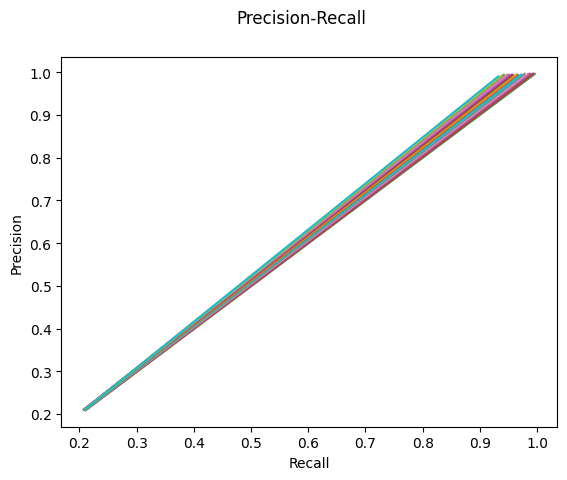

In [154]:
fig = plt.figure()
plt.plot(prc[1], prc[0])
fig.suptitle("Precision-Recall")
plt.ylabel("Precision")
plt.xlabel("Recall")

In [155]:
def roccurve(data, preds, incr=0.1):
    num_classes = preds.size(1)
    thresholds = torch.arange(0.0, 1.0, incr).tolist()
    roc_values = {class_i: [] for class_i in range(num_classes)}

    for threshold in thresholds:
        for class_i in range(num_classes):
            class_preds = preds[:, class_i] >= threshold
            class_data = data == class_i

            tp = (class_preds & class_data).sum().item()
            fp = (class_preds & ~class_data).sum().item()
            tn = (~class_preds & ~class_data).sum().item()
            fn = (~class_preds & class_data).sum().item()

            # Calculating False Positive Rate (FPR) and True Positive Rate (TPR)
            tpr = tp / (tp + fn) if (tp + fn) > 0 else 0
            fpr = fp / (fp + tn) if (fp + tn) > 0 else 0

            roc_values[class_i].append((fpr, tpr))

    # Converting the dictionary of lists into a dictionary of tuples of lists
    for class_i, values in roc_values.items():
        roc_values[class_i] = list(zip(*values))

    return roc_values


In [158]:
roc = roccurve(test_y_gpu, predictions, 500)

In [159]:
roc

{0: [(0.9994675186368477,), (0.996,)],
 1: [(0.9909478168264111,), (0.996,)],
 2: [(0.0,), (0.0,)],
 3: [(0.0,), (0.0,)],
 4: [(0.0,), (0.0,)],
 5: [(0.0,), (0.0,)]}

Text(0.5, 0, 'False Positive')

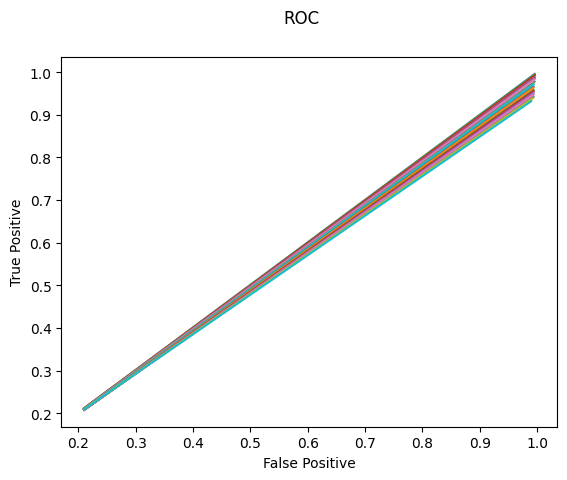

In [160]:
fig = plt.figure()
plt.plot(prc[0], prc[1])
fig.suptitle("ROC")
plt.ylabel("True Positive")
plt.xlabel("False Positive")